## Introduction To Fraud Detection

##### Types:
- Insurance
- Credit card
- Identity theft
- Money laundering
- Tax evasion
- Healthcare
- Product warranty

##### Detecting fraud is challenging:
- Uncommon, that is amounts to only < 0.01% of transactions
- Attempts conceal fraud
- Behavior evolution
- Organized crime, i.e., fraudulent activities perpetrated by networks

- Fraud detection requires training an algorithm to identify concealed observations from any normal observations

##### Fraud analytics teams:
-  Often use rules based systems, based on manually set thresholds and experience
- Receive external lists of fraudulent accounts and names (suspicious names or track an external hit list from cops to reference check against the client base)
- Sometimes use machine learning algorithms to detect fraud or suspicious behavior where existing sources can be used as inputs into the ML model and the veracity of rules based labels may be verified

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import sys
import datetime 
import pickle

#Importing Data visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Necessary ML Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn import tree

#For Dealing with Imbalanced Datasets
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

#Importing Necessary ML Libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import zscore

# Other Libraries
import time
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [2]:
print(os.getcwd())  # Prints the current working directory

C:\Users\Administrator\Desktop\Course Material - DONO


### Reading Data 

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

- **“Time”: Number of seconds elapsed between the transaction in question and the first transaction carried out by a credit card user**
- **“V1” ~ “V28”: Output of a PCA dimensionality reduction on original raw data to protect user identities and sensitive information**
- **“Amount”: Transaction amount**
- **“Class”: 1 stands for fraud, 0 otherwise**

In [5]:
#Number of records and features
df.shape

(284807, 31)

In [6]:
#Dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- All details of the cardholders have been anonymized via a principal component analysis (PCA) transform
- Over 280,000 records and 31 features without any null or missing values

In [7]:
## descriptive statistics
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [8]:
# fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There are {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There are 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

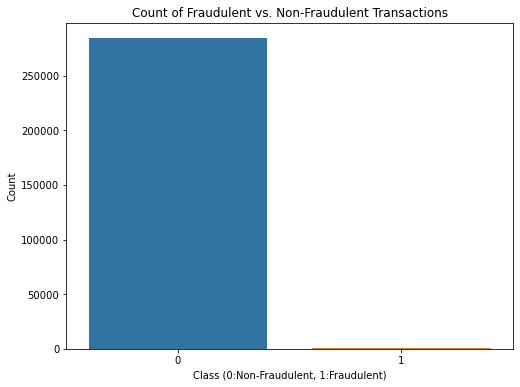

In [9]:
## visualizing class distribution
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

**There's severe skew in the class distribution, with about 99.827 percent of transactions marked as normal and about 0.173 percent marked as fraudulent**

In [10]:
# analysing the average transaction amount in fraud vs valid
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

print('Amount details of fraudulent transaction')
Fraud.Amount.describe()

Amount details of fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
print('Amount details of valid transaction')
Valid.Amount.describe()

Amount details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

The average money transaction for the fraudulent ones are more which makes this problem crucial to deal with.

Text(0.5, 1.0, 'Heatmap Showcasing Correlation')

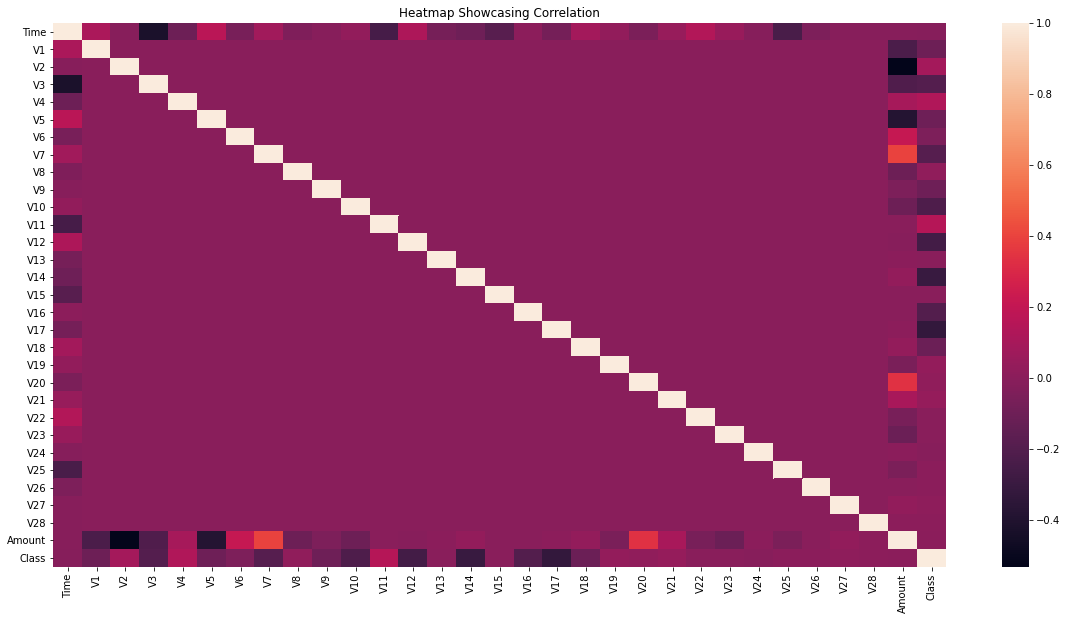

In [12]:
#Correlation between the features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())
plt.title('Heatmap Showcasing Correlation')

Most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, "V2" and "V5" are highly negatively correlated with  "Amount".

<AxesSubplot:xlabel='Class', ylabel='V17'>

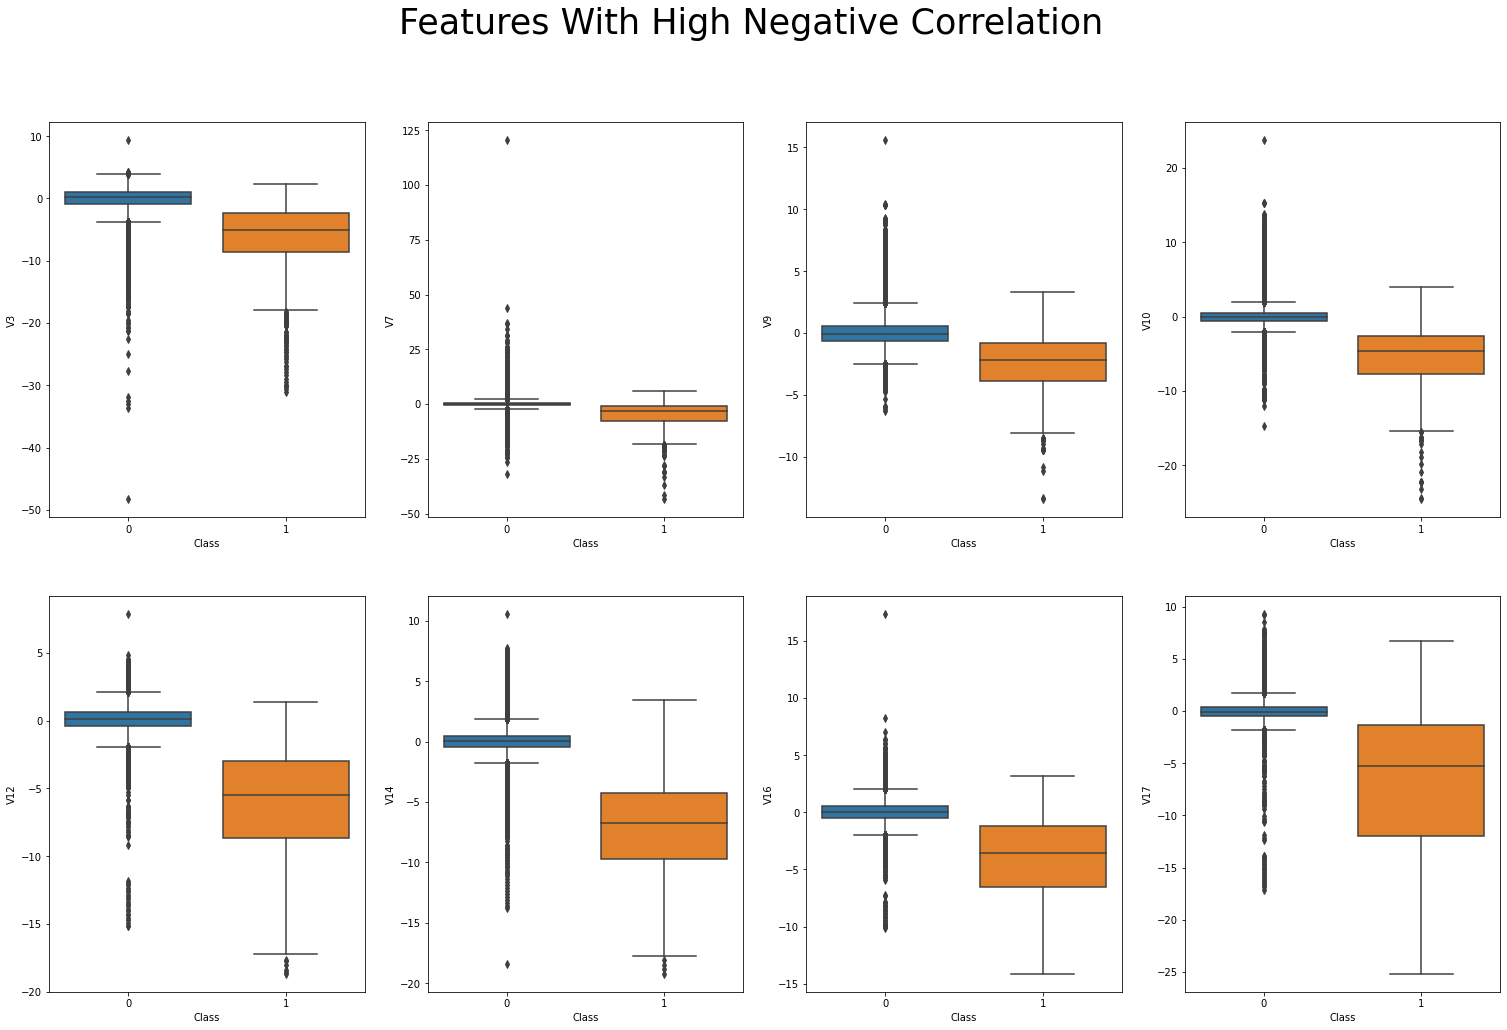

In [13]:
# visualizing the features having high negative correlation with class
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=df, ax=axes[0,0])
sns.boxplot(x="Class", y="V7", data=df, ax=axes[0,1])
sns.boxplot(x="Class", y="V9", data=df, ax=axes[0,2])
sns.boxplot(x="Class", y="V10", data=df, ax=axes[0,3])
sns.boxplot(x="Class", y="V12", data=df, ax=axes[1,0])
sns.boxplot(x="Class", y="V14", data=df, ax=axes[1,1])
sns.boxplot(x="Class", y="V16", data=df, ax=axes[1,2])
sns.boxplot(x="Class", y="V17", data=df, ax=axes[1,3])


### Increase successful detections with data resampling

- Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution
- This is a simple and effective strategy for imbalanced classification problems

1. Undersampling
- Undersampling the majority class (non-fraud cases)
- Straightforward method to adjust imbalanced data
- Takes random draws from the non-fraud observations, to match the occurences of fraud observations

![sampling%20-%201.PNG](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/fraud_detection/undersampling.JPG)

2. Oversampling 
- Oversampling the minority class (fraud cases)
- Takes random draws from the fraud cases and generate copies of those observations to increase the amount of fraud samples

![sampling%20-%202.PNG](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/fraud_detection/oversampling.JPG)

Since undersampling results in information loss, we resort to oversampling methods in this case.

In [14]:
X = df.iloc[:, 1:29].values
Y = df.Class.values

In [15]:
# function for comparison of original data and resampled data
def compare_plot(X, Y, X_resampled, Y_resampled, method):
    plt.subplot(1, 2, 1)
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], label="Class 0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], label="Class 1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[Y_resampled == 0, 0], X_resampled[Y_resampled == 0, 1], label="Class 0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[Y_resampled == 1, 0], X_resampled[Y_resampled == 1, 1], label="Class 1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

In [16]:
def oversample(X, Y, model):
    
    print("Before OverSampling, counts of label '0': {}".format(sum(Y == 0))) 
    print("Before OverSampling, counts of label '1': {} \n".format(sum(Y == 1))) 
    sampler = model()
    X_resample, Y_resample = sampler.fit_resample(X, Y)
    
    print("After OverSampling, counts of label '0': {}".format(sum(Y_resample == 0))) 
    print("After OverSampling, counts of label '1': {}".format(sum(Y_resample == 1))) 

    return X_resample, Y_resample

#### Random Oversampling

- Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset
- This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again
- A straightforward oversampling method which trains the model on many duplicates


Before OverSampling, counts of label '0': 284315
Before OverSampling, counts of label '1': 492 

After OverSampling, counts of label '0': 284315
After OverSampling, counts of label '1': 284315


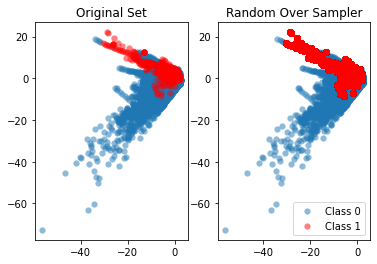

In [17]:
X_resample_ros, Y_resample_ros = oversample(X, Y, RandomOverSampler)
compare_plot(X, Y, X_resample_ros, Y_resample_ros, 'Random Over Sampler')

#### SMOTE

- Synthetic Minority Oversampling Technique 
- SMOTE uses characteristics of nearest neighbors of fraud cases to create new synthetic fraud cases and avoids duplicating observations
- More sophisticated method than random oversampling
- Realistic data set
- Training on synthetic data
- Works well only if the minority case features are similar
- If fraud is spread through the data and not distinct, using nearest neighbors to create more fraud cases may introduce noise into the data as the nearest neighbors might not be fraud cases

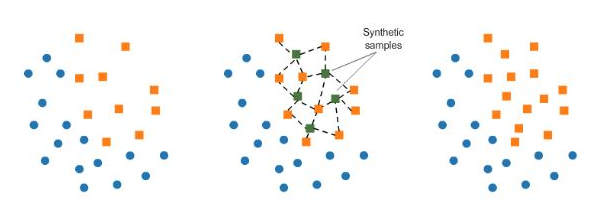

Before OverSampling, counts of label '0': 284315
Before OverSampling, counts of label '1': 492 

After OverSampling, counts of label '0': 284315
After OverSampling, counts of label '1': 284315


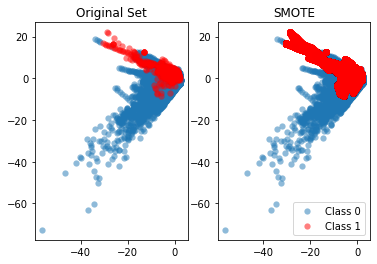

In [18]:
X_resample_sm, Y_resample_sm = oversample(X, Y, SMOTE)
compare_plot(X, Y, X_resample_sm, Y_resample_sm, 'SMOTE')

### Z-Score

- Z-score measures how many standard deviations away a given observation is from the mean.
- The hypothesis of z-score method in anomaly detection is that the data value is in a Gaussian distribution with some skewness and kurtosis, and anomalies are the data points far away from the mean of the population.

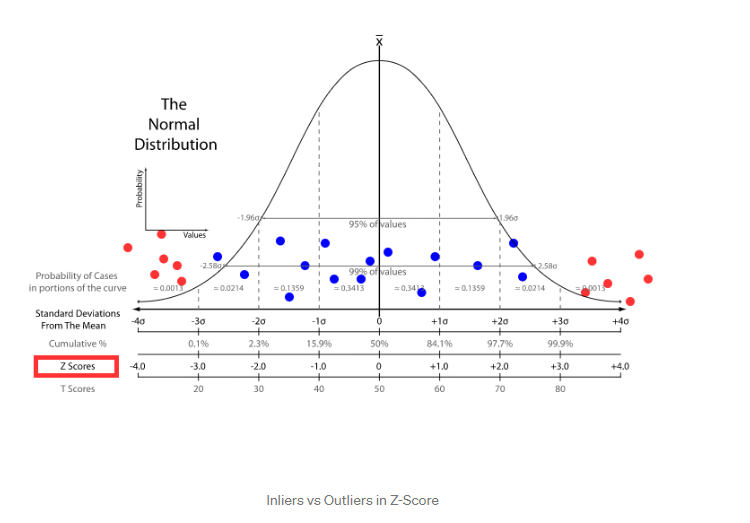

- The blue dots represent inliers, while the red dots are the outliers. The larger the number of standard deviations away from the mean, the more of an anomaly the data point is.
- The core idea is so straightforward that applying z-score method is like picking the low hanging fruits in comparison to other approaches.

In [19]:
## scaling input features using standard scaler
scaler = StandardScaler()
data_std = scaler.fit_transform(df.drop(['Class'], axis=1))
data_std = pd.DataFrame(data_std)
data_std = pd.concat([data_std, df[['Class']]],axis=1)
data_std.columns = df.columns.tolist()
data_std   

Time        V1        V2        V3        V4        V5        V6  \
0      -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1      -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2      -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3      -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4      -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.641931 -6.065842  6.099286 -6.486245 -1.459641 -3.886611 -1.956690   
284803  1.641952 -0.374121 -0.033356  1.342145 -0.521651  0.629040  0.794446   
284804  1.641974  0.980024 -0.182434 -2.143205 -0.393984  1.905833  2.275262   
284805  1.641974 -0.122755  0.321250  0.463320  0.487192 -0.273836  0.468155   
284806  1.642058 -0.272331 -0.114899  0.463866 -0.357570 -0.009089 -0.487602   

              V7        V8        V9  ...       V21       V22       V23  \
0       0.193679  0.082637  0.331128  ... -0.024923  0.382854 -0.176911   
1      -0.063700  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201   
2       0.639776  0.207373 -1.378675  ...  0.337632  1.063358  1.456320   
3       0.192071  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777   
4       0.479302 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123   
...          ...       ...       ...  ...       ...       ...       ...   
284802 -3.975628  6.116573  1.742559  ...  0.290602  0.154146  1.624574   
284803  0.019667  0.246886  0.532299  ...  0.291625  1.273781  0.019958   
284804 -0.239939  0.593140  0.393630  ...  0.315913  0.796788 -0.060053   
284805 -0.554672  0.568631  0.356887  ...  0.361112  1.102451 -0.261503   
284806  1.274769 -0.347176  0.442532  ...  0.355411  0.886149  0.603365   

             V24       V25       V26       V27       V28    Amount  Class  
0       0.110507  0.246585 -0.392170  0.330892 -0.063781  0.244964      0  
1      -0.561131  0.320694  0.261069 -0.022256  0.044608 -0.342475      0  
2      -1.138092 -0.628537 -0.288447 -0.137137 -0.181021  1.160686      0  
3      -1.941027  1.241904 -0.460217  0.155396  0.186189  0.140534      0  
4       0.233250 -0.395202  1.041611  0.543620  0.651816 -0.073403      0  
...          ...       ...       ...       ...       ...       ...    ...  
284802 -0.841000  2.756320  0.518500  2.337901  2.495529 -0.350151      0  
284803 -1.677920 -1.163726 -0.819647  0.169641 -0.162164 -0.254117      0  
284804  1.056944  0.509797 -0.181182  0.011037 -0.080467 -0.081839      0  
284805  0.203428 -1.091855  1.133635  0.269604  0.316687 -0.313249      0  
284806  0.014526 -0.908631 -1.696853 -0.005984  0.041350  0.514355      0  

[284807 rows x 31 columns]

Text(0.5, 0.98, 'Fraudulent Transactions (Red) VS Normal Transactions (Blue)')

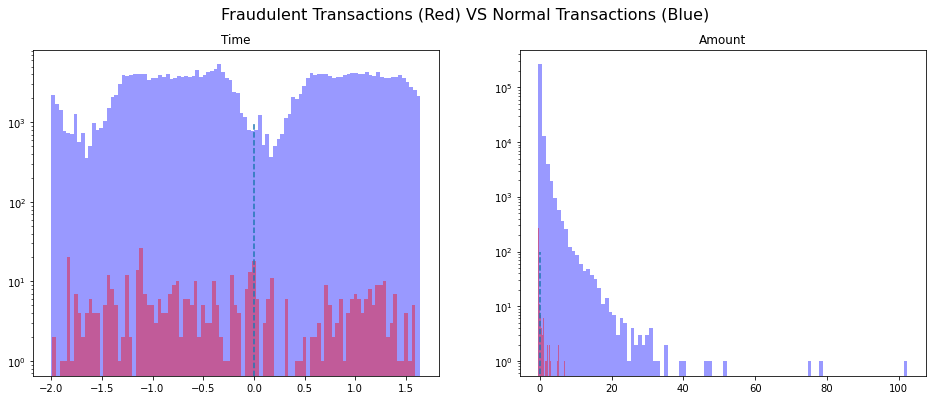

In [20]:
'''
    distribution of features Time, Amount
    red: fraudulent transactions
    blue: legit transactions
'''
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].hist(data_std[data_std['Class']==0]['Time'], bins=100, alpha=0.4, color='b')
axes[0].hist(data_std[data_std['Class']==1]['Time'], bins=100, alpha=0.4, color='r')
axes[0].vlines(x=data_std['Time'].mean(),ymin=0, ymax=10**3, linestyles='dashed')
axes[0].set_yscale('log')
axes[0].set_title('Time')

axes[1].hist(data_std[data_std['Class']==0]['Amount'], bins=100, alpha=0.4, color='b')
axes[1].hist(data_std[data_std['Class']==1]['Amount'], bins=100, alpha=0.4, color='r')
axes[1].vlines(x=data_std['Amount'].mean(),ymin=0, ymax=10**2, linestyles='dashed')
axes[1].set_yscale('log')
axes[1].set_title('Amount')

fig.suptitle('Fraudulent Transactions (Red) VS Normal Transactions (Blue)', fontsize=16)

**Both "Time" and "Amount" are unable to separate outliers from inliers properly (red are overlapped with blue bars)**

Text(0.5, 0.98, 'Fraudulent Transactions (Red) VS Normal Transactions (Blue)')

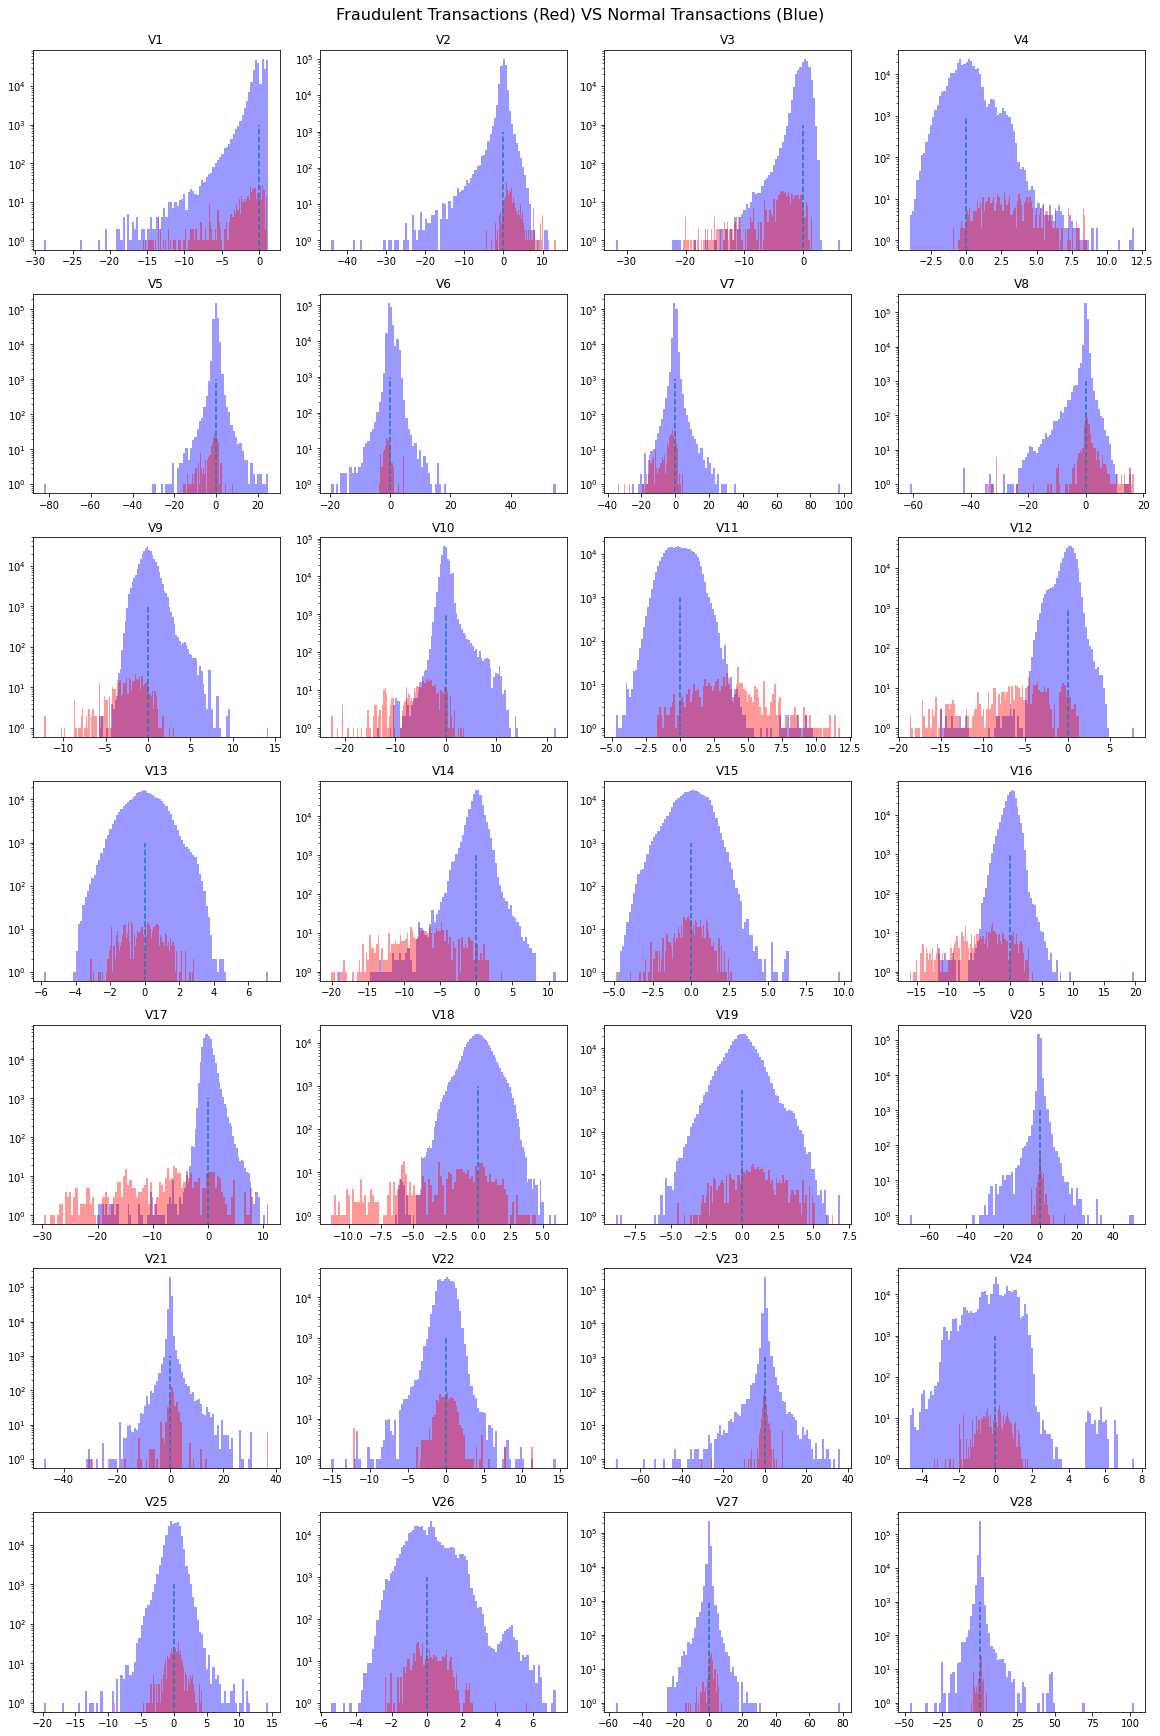

In [21]:
'''
    distribution of features V1 ~ V28
    red: fraudulent transactions
    blue: legit transactions
'''
ncols = 4
fig2, axes = plt.subplots(nrows=7, ncols=4, constrained_layout=True, figsize=(16, 24))

for i in range(1,29):
    m = int(np.floor((i-1)/ncols))
    n = (i-1)%ncols
    col = 'V'+str(i)
    axes[m,n].hist(data_std[data_std['Class']==0][col], bins=100, alpha=0.4, color='b')
    axes[m,n].hist(data_std[data_std['Class']==1][col], bins=100, alpha=0.4, color='r')
    axes[m,n].set_title(col)
    axes[m,n].vlines(x=data_std[col].mean(),ymin=0, ymax=10**3, linestyles='dashed')
    axes[m,n].set_yscale('log')
    
fig2.suptitle('Fraudulent Transactions (Red) VS Normal Transactions (Blue)', fontsize=16)

**Majority of the features, similar to "Time" and "Amount", are unable to distinguish anomaly from inliers. Such inputs will not be fed into z-score model**

In [22]:
## filtering out necessary columns for building z-score model
x_data_z = data_std[["V9", "V10", "V11", "V12", "V14", "V16", "V17", "V18"]]
y_data_z = data_std[["Class"]]

In [23]:
## calculation of z-score
cols = x_data_z.columns.tolist()
zscore_df = pd.DataFrame()
for col in cols:
    # apply abs because the zscore on 2 ends are the abnormals, both the positive and negative
    abs_zscore = np.abs(zscore(x_data_z[col]))
    zscore_df[str(col)+'_zscore'] = (abs_zscore - np.min(abs_zscore))/(np.max(abs_zscore) - np.min(abs_zscore))

In [24]:
## averaging the score of each feature into an overall zscore for all features
all_cols_zscore = zscore_df.mean(axis=1)
zscore_df["all_cols_zscore"] = (all_cols_zscore - np.min(all_cols_zscore))/ (np.max(all_cols_zscore) - np.min(all_cols_zscore))

In [25]:
## concat with the label "Class": 1 for fraud, 0 for otherwise
zscore_df = pd.concat([zscore_df, y_data_z.reset_index(drop=True)], axis=1)
zscore_df.head()

V9_zscore  V10_zscore  V11_zscore  V12_zscore  V14_zscore  V16_zscore  \
0   0.023326    0.003693    0.045894    0.033066    0.016195    0.027167   
1   0.016377    0.006791    0.134182    0.057014    0.007483    0.026793   
2   0.097123    0.008445    0.051960    0.003537    0.008637    0.166911   
3   0.088939    0.002235    0.018844    0.009539    0.014985    0.061198   
4   0.052435    0.030627    0.068462    0.028806    0.058273    0.026072   

   V17_zscore  V18_zscore  all_cols_zscore  Class  
0    0.008265    0.002715         0.021196      0  
1    0.004562    0.019303         0.040882      0  
2    0.044111    0.012776         0.062113      0  
3    0.027187    0.206951         0.068497      0  
4    0.009420    0.004021         0.041866      0

In [26]:
## Sort the dataset by “all_cols_zscore” from highest to lowest
## The higher the score, the more abnormal

zscore_df_sorted = zscore_df.sort_values(by=['all_cols_zscore'], ascending=False).reset_index(drop=True)

In [27]:
## create the threshold list used for labeling 
threshold_list = [0.0015, 0.0017, 0.0020, 0.0022, 0.0025, 0.0027 ,00.0030, 0.0032]
cutoff_list = [int(item * len(x_data_z)) for item in threshold_list]

precision_list = []
recall_list = []

for iter, cutoff in enumerate(cutoff_list):
    zscore_df_sorted.loc[:cutoff,'predicted_class'] = 1
    zscore_df_sorted.loc[cutoff:,'predicted_class'] = 0
    zscore_df_sorted['predicted_class'] = zscore_df_sorted['predicted_class'].astype(int)
    
    tmp_precision = len(zscore_df_sorted[(zscore_df_sorted['predicted_class']==1) & (zscore_df_sorted['Class']==1)]) / \
                         len(zscore_df_sorted[zscore_df_sorted['predicted_class']==1])
    precision_list.append(np.around(tmp_precision, 6))

    tmp_recall = len(zscore_df_sorted[(zscore_df_sorted['predicted_class']==1) & (zscore_df_sorted['Class']==1)]) / \
                      len(zscore_df_sorted[zscore_df_sorted['Class']==1])   
    recall_list.append(np.around(tmp_recall, 6))
    

In [28]:
## saving precision and recall as a dataframe    
zscore_performance_df = pd.DataFrame()
zscore_performance_df['threshold'] = threshold_list
zscore_performance_df['cutoff'] = cutoff_list
zscore_performance_df['precision'] = precision_list
zscore_performance_df['recall'] = recall_list
zscore_performance_df

threshold  cutoff  precision    recall
0     0.0015     427   0.660422  0.573171
1     0.0017     484   0.603306  0.593496
2     0.0020     569   0.543058  0.628049
3     0.0022     626   0.500000  0.636179
4     0.0025     712   0.469101  0.678862
5     0.0027     768   0.457031  0.713415
6     0.0030     854   0.426230  0.739837
7     0.0032     911   0.408342  0.756098

- High recall over precision is preferred since anomalies are sparse and rare in the population and our goal is to detect as many as possible
- Our data contains 492 transactions labelled as fraud, hence a threshold of 0.17% (cut-off 484) yields us a reasonable precision and recall that may help in anomaly detection
- Z scores aren't much reliable for detecting suspicious behaviour, which is why Machine Learning algorithms have taken over as prominent fraud detection techniques

### Fraud Detection Algorithms

   - For decades, financial organizations used rule-based monitoring systems for fraud detection
   - These legacy solutions were deployed in SQL or C/C++; they were attempts of the engineers to transfer the knowledge of domain experts into sequel queries, which would typically end up being long, convoluted, and extremely brittle

   - Rules Based Systems
       - Rules-based fraud detection identifies fraud based on a set of unusual attributes, including unusual time stamps, account numbers, transaction types, and amounts, among other criteria
       - Entail using algorithms that perform several fraud detection scenarios, manually written by fraud analysts
       ![title](https://miro.medium.com/max/700/1*WEfz0p54yRfZqYQlCx79UQ.png)
       
     - Might block transactions from risky zip codes
     - Block transactions from cards used too frequently (e.g. last 30 minutes)
     - Can catch fraud, but also generates false alarms (false positive)
     - Today, legacy systems apply about 300 different rules on average to approve a transaction which is why rule-based systems remain too straightforward; they require adding/adjusting scenarios manually and can hardly detect implicit correlations
     - On top of that, rule-based systems often use legacy software that can hardly process the real-time data streams that are critical for the digital space

    - Limitations:
        - Fixed threshold per rule and it's difficult to determine the threshold; they don't adapt over time
        - Limited to yes / no outcomes, whereas ML yields a probability
            - probability allows for fine-tuning the outcomes (i.e. rate of occurences of false positives and false negatives)
        - Fails to capture interaction between features
            - Ex. Size of the transaction only matters in combination to the frequency
    
   - ML Based Systems
     - Adapt to the data, thus can change over time
     - Uses all the data combined, rather than a threshold per feature
     - Produces a probability, rather than a binary score
     - Typically have better performance and can be combined with rules.
     
   

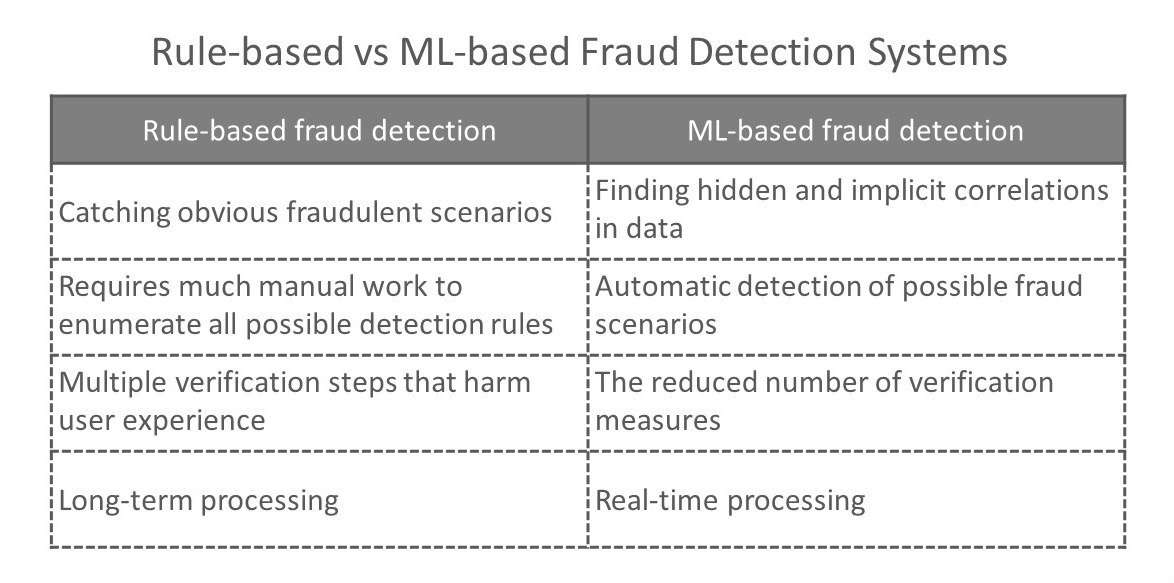

### Why Machine Learning?
 
- ML algorithms can process millions of data objects quickly and link instances from seemingly unrelated datasets to detect suspicious patterns
- They help find hidden correlations between user behavior and the likelihood of fraudulent actions
- They’re one of the only tools left that can help banks and FinTechs keep up with new defrauding schemes, which are growing increasingly sophisticated

- **Speed – Machine learning algorithms can evaluate enormous amounts of data in a very short amount of time. They have the ability to continuously collect and analyze new data in real-time. Speed is increasingly important as the velocity and volume of eCommerce increases.**
- **Efficiency – Machine learning algorithms can perform repetitive tasks and detect subtle changes in patterns across large amounts of data. This is critical to detecting fraud in a much shorter amount of time than what humans can perform. Algorithms can analyze hundreds of thousands of payments per second, which is more work than several human analysts can do in the same amount of time. This reduces costs as well as time taken to analyze transactions, thus making the process more efficient**
- **Scalability – As the number of transactions increases for banks, the pressure on a rules-based system and human analysis increases. This means a rise in costs and time, and a reduction in accuracy. With a machine learning algorithm, it’s just the opposite. The more data, the better. The program improves as more data comes in, enabling it to detect fraud faster and with more accuracy**
- **Accuracy – Machine learning algorithms can be trained to analyze and detect patterns across seemingly insignificant datastet. They can identify subtle or non-intuitive patterns which would be difficult, or maybe even impossible, for humans to catch. This increases the accuracy of fraud detection, meaning that there will be fewer false positives and frauds that go undetected.**

### Leading Financial Institutions Using ML Technology to Combat Fraudsters

- **MasterCard** integrated machine learning and AI to track and process such variables as transaction size, location, time, device, and purchase data. The system assesses account behavior in each operation and provides real-time judgment on whether a transaction is fraudulent. The project aims at reducing the number of false declines in merchant payments. The recent study shows that false declines make merchants lose about 118 billion USD per year while clients’ loss is about 9 billion USD per year. It’s the largest area for fraud in financial services. So fraud prevention is a strategic goal for banking and payments industries.

- **Feedzai**, a fintech company, claims that a fine-tuned machine learning solution can detect up to 95 percent of all fraud and minimize the cost of manual reconciliations, which accounts now for 25 percent of fraud expenditures. They assert their software can help banks prevent fraud and money laundering by developing detailed risk profiles on customers and scoring them based on granular data.

- **DataVisor**’s predictive analytics-based fraud detection solutions can provide risk scores for in-person and ecommerce transactions, claims, loan applications, and financial services payments. The software apparently has the capability to proactively search for and detect new risk factors based on newly found fraud methods and new emerging ones. Helped banks detect use of specific fraud methods in their online applications for loans which include the use of forged identities, stolen identities, and coordinated attacks on their portfolio of customer data.

- **Capgemini** claims that fraud detection systems using machine learning and analytics minimize fraud investigation time by 70 percent and improve detection accuracy by 90 percent


### Anomaly Detection To Reveal Suspicious Transactions

- Anomaly detection is one of the common anti-fraud approaches in data science
- It is based on classifying all objects in the available data into two groups: normal distribution and outliers
- Outliers, in this case, are the objects (e.g. transactions) that deviate from normal ones and are considered potentially fraudulent
- The variables in data that can be used for fraud detection are numerous. They range from transaction details to images and unstructured texts.
- By analyzing these parameters, anomaly detection algorithms can answer the following questions:
    - Do clients access services in an expected way?
    - Are user actions normal?
    - Are transactions typical?
    - Are there any inconsistencies in the information provided by users?
- The anomaly detection approach is perhaps the most straightforward as it provides simple binary answers
- The model is trained to have a baseline for the contents of banking transactions, loan applications, or information for opening a new account, etc. 
- A software can then notify a human monitor of any deviations from the normal pattern in order for it to be reviewed
- The monitor can accept or reject this alert, which signals to the machine learning model that its determination of fraud from a transaction, application, or customer information is correct or not
- This would further train the machine learning model to “understand” that the deviation it found was either fraud or a new acceptable deviation


### Traditional Method of Fraud Detection

- We're going to try finding fraud cases in our credit card dataset the "old way". First we'll define threshold values using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud. This is common practice within fraud analytics teams.

- Statistical thresholds are often determined by looking at the **mean** values of observations. Let's check whether feature means differ between fraud and non-fraud cases. Then, we'll use this information to create common sense thresholds. Finally, we'll check how well this performs in fraud detection.



##### Instructions:

- Use groupby() to group df on Class and obtain the mean of the features.
- Create the condition V1 smaller than -3, and V3 smaller than -5 as a condition to flag fraud cases.
- As a measure of performance, use the crosstab function from pandas to compare our flagged fraud cases to actual fraud cases.

In [29]:
df.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30 columns]

In [30]:
df['flag_as_fraud'] = np.where(np.logical_and(df.V1 < -3, df.V3 < -5), 1, 0)

In [31]:
pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud       0     1
Actual Fraud               
0              283089  1226
1                 322   170

With this rule, 170 out of 492 fraud cases are detected, 322 are not detected, and 1226 false positives are identified.

### Using ML Classification to Detect Fraud
#### Classification
- The problem of identifying to which class a new observation belongs, on the basis of a training set of data containing observations whose class is known
- Goal: use known fraud cases to train a model to recognize new cases
- Classes are sometimes called targets, labels or categories
- Spam detection in email service providers can be identified as a classification problem
- Binary classification since there are only 2 classes, spam and not spam
- Fraud detection is also a binary classification prpoblem
Patient diagnosis
Classification problems normall have categorical output like yes/no, 1/0 or True/False
Variable to predict:
\begin{align} y∈0,1 \end{align}
 
- 0: negative calss ('majority' normal cases)
- 1: positive class ('minority' fraud cases)


#### Logistic Regression
- Logistic Regression is one of the most used ML algorithms in binary classification
![title](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZwJ_5hiojNrFta35LpPWaADTlw7XRsEkhfw&usqp=CAU)
- Can be adjusted reasonably well to work on imbalanced data...useful for fraud detection

#### Neural Network
- Can be used as classifiers for fraud detection
- Capable of fitting highly non-linear models to the data
- More complex to implement than other classifiers.
![title](https://www.researchgate.net/profile/Md-Mijanur-Rahman-4/publication/334898568/figure/fig1/AS:787512180080642@1564768943711/Layers-of-neural-network-in-ATM-card-fraud-detection.png)


####  Decision Trees¶
- Commonly used for fraud detection
- Transparent results, easily interpreted by analysts
- Decision trees are prone to overfit the data

![title](https://spd.group/wp-content/uploads/2020/11/E-commerce-Fraud-Detection-07.jpg)

#### Random Forests

- Random Forests are a more robust option than a single decision tree
    - Construct a multitude of decision trees when training the model and outputting the class that is the mode or mean predicted class of the individual trees
    - A random forest consists of a collection of trees on a random subset of features
    - Final predictions are the combined results of those trees
    - Random forests can handle complex data and are not prone to overfit
    - They are interpretable by looking at feature importance, and can be adjusted to work well on highly imbalanced data
    - Their drawback is they're computationally complex
    - Very popular for fraud detection
    - A Random Forest model will be optimized in the exercises
    
![title](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/fraud_detection/random_forest.JPG)

### Natural hit rate

First we need to explore how prevalent fraud is in the dataset, to understand what the "natural accuracy" is, if we were to predict everything as non-fraud. It's is important to understand which level of "accuracy" we need to "beat" in order to get a better prediction than by doing nothing.

Instructions

- Count the total number of observations by taking the length of your labels y.
- Count the non-fraud cases in our data by using list comprehension on y; remember y is a NumPy array so .value_counts() cannot be used in this case.
- Calculate the natural accuracy by dividing the non-fraud cases over the total observations.
- Print the percentage.

In [32]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 1:30].values
    y = df.Class.values
    return X, y

In [33]:
X, y = prep_data(df)
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (284807, 29)
y shape: (284807,)


In [34]:
X[0, :]

array([-1.35980713e+00, -7.27811733e-02,  2.53634674e+00,  1.37815522e+00,
       -3.38320770e-01,  4.62387778e-01,  2.39598554e-01,  9.86979013e-02,
        3.63786970e-01,  9.07941720e-02, -5.51599533e-01, -6.17800856e-01,
       -9.91389847e-01, -3.11169354e-01,  1.46817697e+00, -4.70400525e-01,
        2.07971242e-01,  2.57905802e-02,  4.03992960e-01,  2.51412098e-01,
       -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,  6.69280749e-02,
        1.28539358e-01, -1.89114844e-01,  1.33558377e-01, -2.10530535e-02,
        1.49620000e+02])

In [35]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [36]:
# Count the total number of observations from the length of y
total_obs = len(y)
total_obs

284807

In [37]:
# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)
count_non_fraud

284315

In [38]:
percentage = count_non_fraud/total_obs * 100
print(f'{percentage:0.2f}%')

99.83%


This tells us that by doing nothing, we would be correct in **99.83%** of the cases. So now you understand, that if we get an accuracy of less than this number, our model does not actually add any value in predicting how many cases are correct. Let's see how a random forest does in predicting fraud in our data.

## Fitting Classification Models


Evaluation metrics:

- **Accuracy score** - ratio of number of correct predictions to the total number of input samples
![title](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/fraud_detection/accuracy.JPG)
    - Accuracy isn't a reliable performance metric when working with highly imbalanced data (such as fraud detection)
    - By doing nothing, aka predicting everything is the majority class (right image), a higher accuracy is obtained than by trying to build a predictive model (left image)

- **ROC-AUC** - ROC is a probability curve and AUC represents the degree or measure of separability; tells how much the model is capable of distinguishing between classes

- **Confusion matrix** - a kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table)
![title](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/fraud_detection/confusion_matrix_advanced.JPG)

- False Positives (FP) / False Negatives (FN)

    - FN: predicts the person is not pregnant, but actually is
        - Cases of fraud not caught by the model
    - FP: predicts the person is pregnant, but actually is not
        - Cases of 'false alarm'
- the business case determines whether FN or FP cases are more important
    - a credit card company might want to catch as much fraud as possible and reduce false negatives, as fraudulent transactions can be incredibly costly
        - a false alarm just means a transaction is blocked
    - an insurance company can't handle many false alarms, as it means getting a team of investigators involved for each positive prediction
- True Positives / True Negatives are the cases predicted correctly (e.g. fraud / non-fraud)



- **Precision** - quantifies the number of positive class predictions that actually belong to the positive class.
-Credit card company wants to optimize for recall
-Insurance company wants to optimize for precision
 
- Fraction of actual fraud cases out of all predicted fraud cases
    - true positives relative to the sum of true positives and false positives
$$Precision=\frac{\#\space True\space Positives}{\#\space True\space Positives+\#\space False\space Positives}$$



- **Recall** - quantifies the number of positive class predictions made out of all positive examples in the dataset.
- Fraction of predicted fraud cases out of all actual fraud cases
    - true positives relative to the sum of true positives and false negative
- Precision and recall are typically inversely related
    - As precision increases, recall falls and vice-versa
    
    $$Recall=\frac{\#\space True\space Positives}{\#\space True\space Positives+\#\space False\space Negatives}$$
    
    ![title](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/fraud_detection/precision_recall_inverse.JPG)


- **F-score** - harmonic mean of precision and recall and a better measure than accuracy score.
    - Weighs both precision and recall into on measure
    - is a performance metric that takes into account a balance between Precision and Recall
    
    $$ \begin{align}
F-measure = \frac{2\times{Precision}\times{Recall}}{Precision\times{Recall}} \\ 
\\
= \frac{2\times{TP}}{2\times{TP}+FP+FN}
\end{align}$$


- **Receiver Operating Characteristic (ROC) curve** 
    - Created by plotting the true positive rate against the false positive rate at various threshold settings
    - Useful for comparing performance of different algorithms
    
    ![title](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/fraud_detection/roc_curve.JPG)

In [39]:
#Function for evaluation metrics
def evaluation_metrics(model,y_test,y_scores):
    acc_score = accuracy_score(y_test,y_scores)
    precision = precision_score(y_test, y_scores)
    recall = recall_score(y_test, y_scores)
    F1_score = f1_score(y_test, y_scores)
    ROC_AUC = roc_auc_score(y_test, y_scores)
    
    print('Accuracy score: ', acc_score)
    print('Precision: ',precision)
    print('Recall: ',recall)
    print('F1_Score:',F1_score)
    print('ROC_AUC score: ', ROC_AUC)
    print('Confusion matrix:')
    print(confusion_matrix(y_test,y_scores))
    print('Classification Report:')
    print(classification_report(y_test,y_scores))
    
    return ({'Model':model,'Accuracy':acc_score,'Precision':precision,'Recall':recall,'F1-Score':F1_score,'ROC_AUC':ROC_AUC})

In [40]:
#Creating an empty metrics dictionary to append the values
metrics = {'Models':[],
          'Accuracy':[],
          'Precision':[],
          'Recall':[],
          'F1-Score':[],
          'ROC_AUC':[]
          }

#Function to update metrics dictionary for each model being fitted
def update_metrics(metrics,Model_met):
    
    metrics['Models'].append(Model_met['Model'])
    metrics['Accuracy'].append(Model_met['Accuracy'])
    metrics['Precision'].append(Model_met['Precision'])
    metrics['Recall'].append(Model_met['Recall'])
    metrics['F1-Score'].append(Model_met['F1-Score'])
    metrics['ROC_AUC'].append(Model_met['ROC_AUC'])
    
    return metrics

### Logistic Regrssion Model

In [41]:
# Create the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
# Fit a logistic regression model on our data
Logistic_model = LogisticRegression(solver='liblinear')
Logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [43]:
# Obtain model predictions
predicted_lr = Logistic_model.predict(X_test)

In [44]:
#Performance evaluation
lr_met = evaluation_metrics('Logistic_Reg',y_test,predicted_lr)
metrics = update_metrics(metrics,lr_met)

Accuracy score:  0.999204147794436
Precision:  0.883495145631068
Recall:  0.6190476190476191
F1_Score: 0.728
ROC_AUC score:  0.8094534662486266
Confusion matrix:
[[85284    12]
 [   56    91]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



### Decision Tree  Model

In [45]:
# Instantitating the decisiontree classifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# Obtain model predictions
dt_predicted = dt_model.predict(X_test)

In [47]:
#Performance evaluation
dt_met = evaluation_metrics('Decision Tree',y_test,dt_predicted)
metrics = update_metrics(metrics,dt_met)

Accuracy score:  0.9993211848834895
Precision:  0.8296296296296296
Recall:  0.7619047619047619
F1_Score: 0.7943262411347518
ROC_AUC score:  0.8808175563416137
Confusion matrix:
[[85273    23]
 [   35   112]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.83      0.76      0.79       147

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### Random Forest Model

In [48]:
# Instantiating random forest classifier model
rd_model = RandomForestClassifier()
rd_model.fit(X_train, y_train)

RandomForestClassifier()

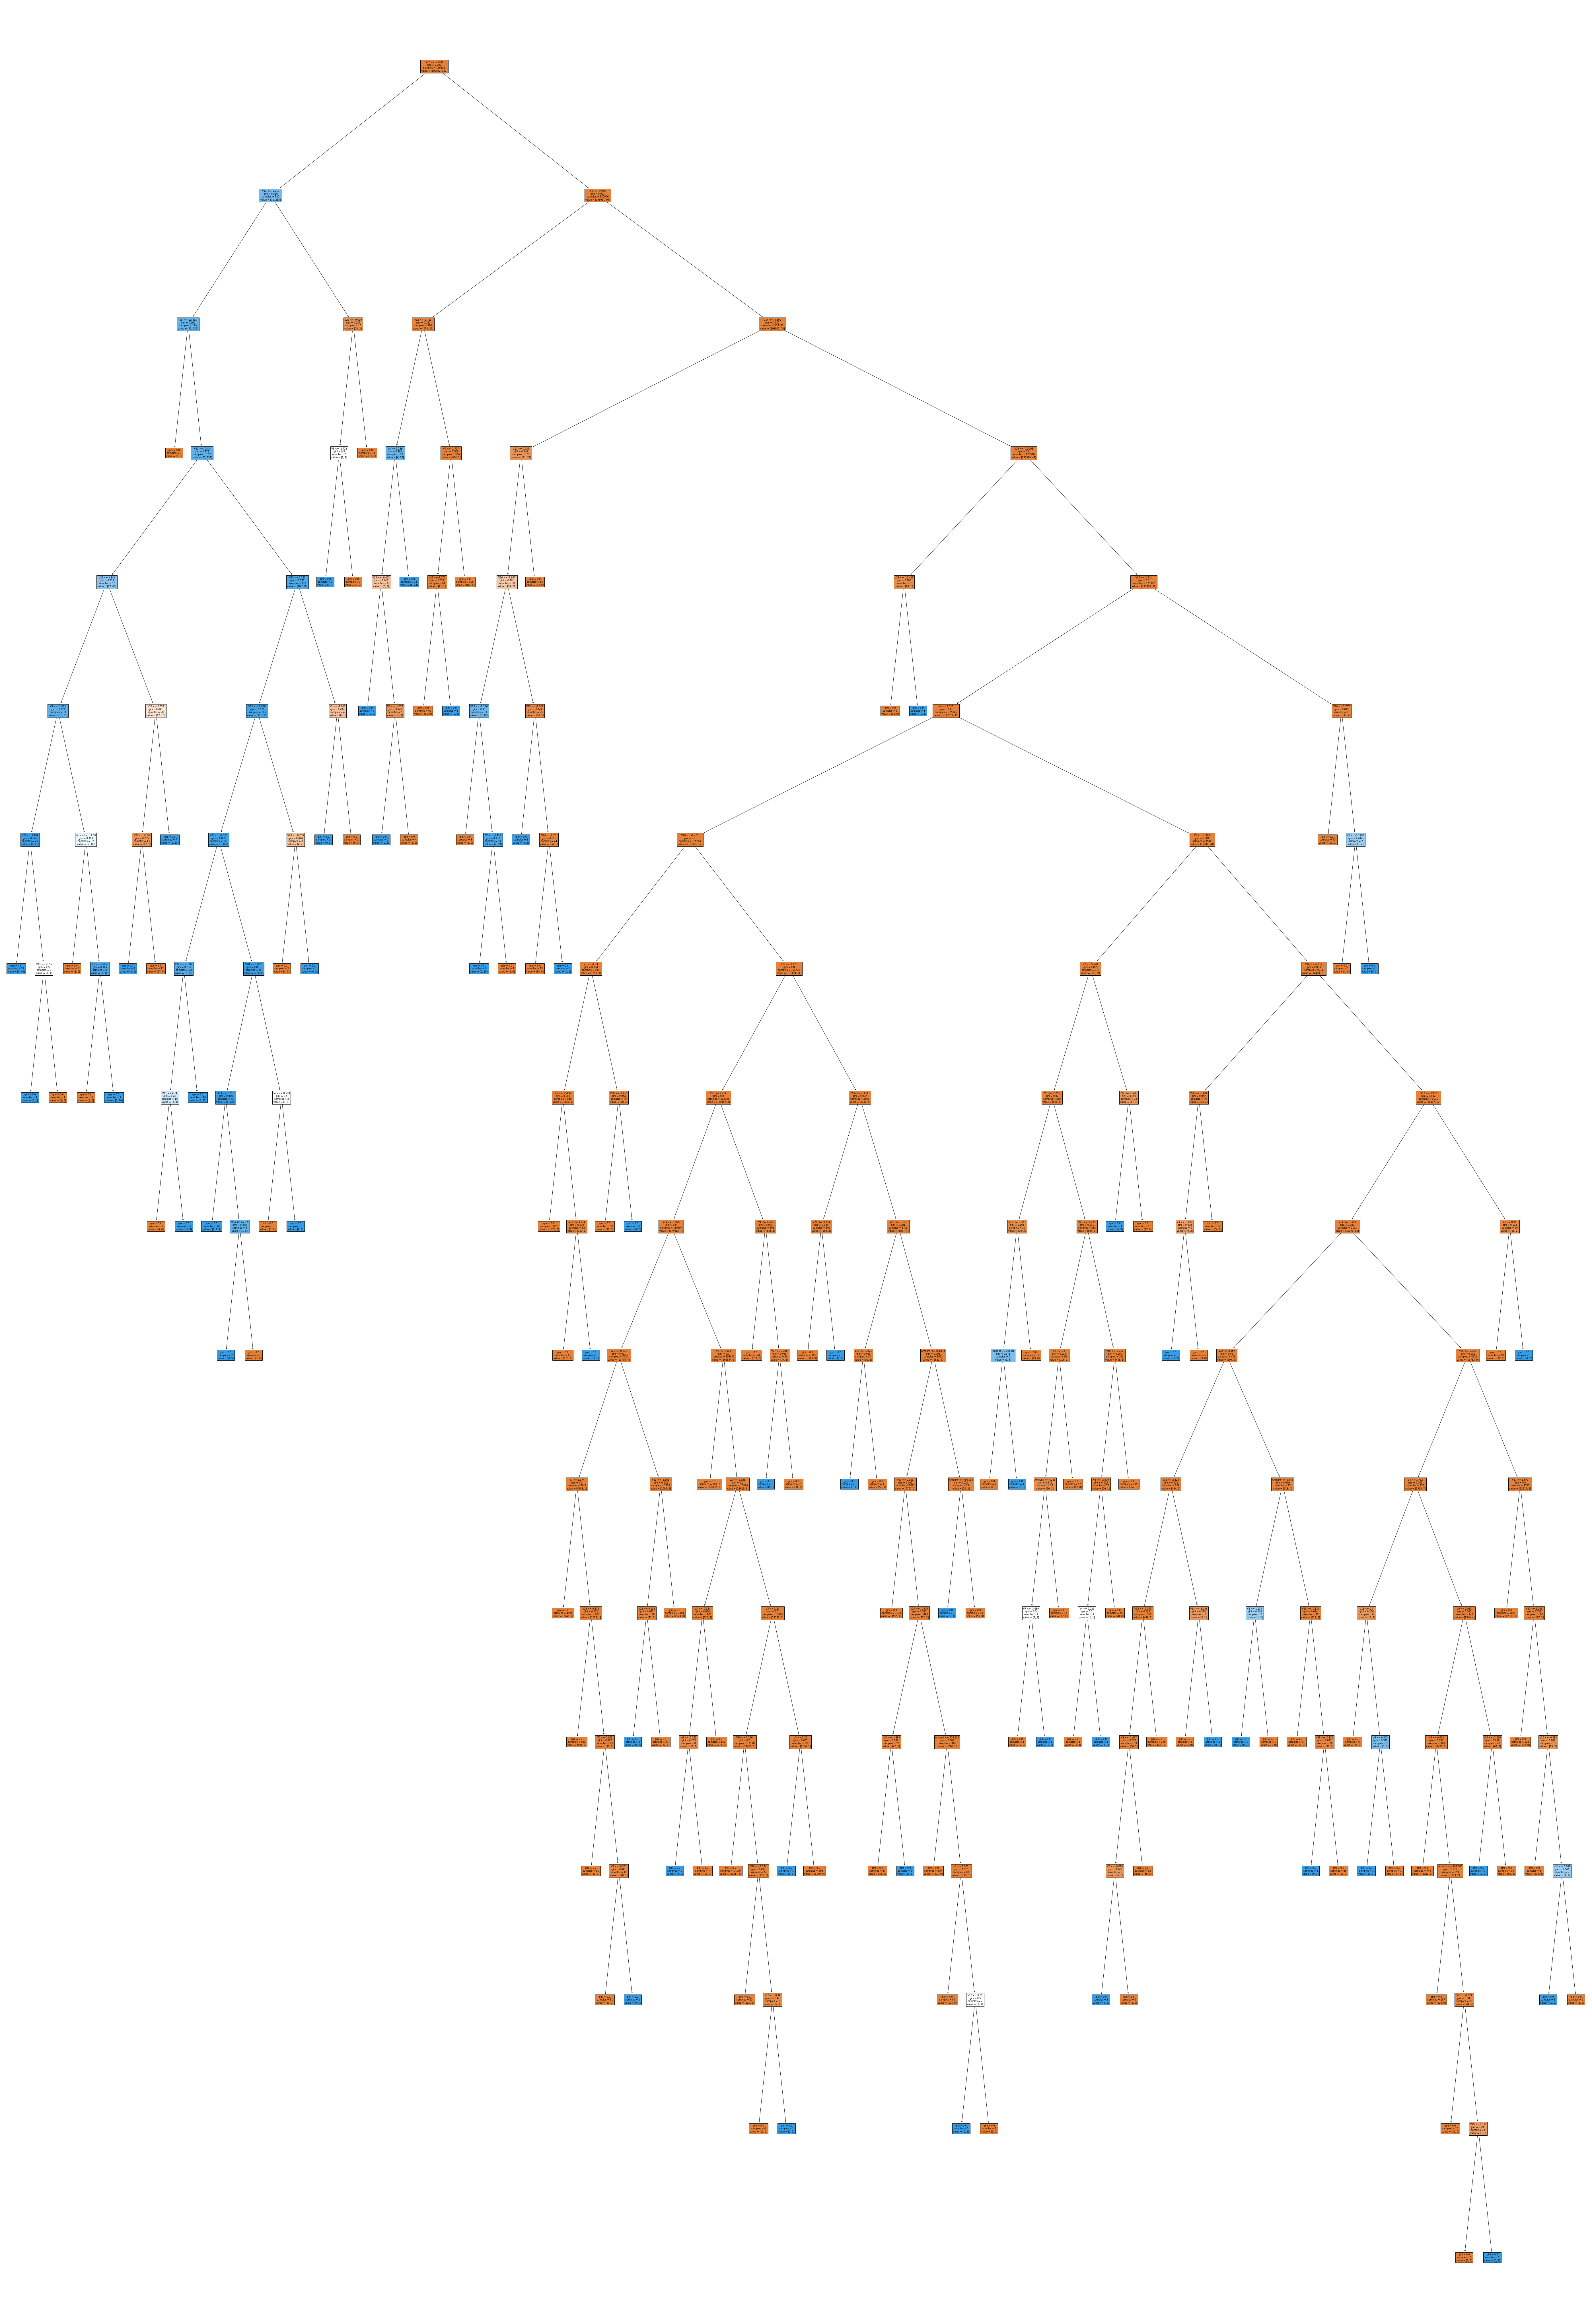

In [49]:
# Visualizing some of the decision tree components
plt.figure(figsize=(100,150))
_ = tree.plot_tree(rd_model.estimators_[10], feature_names=df.columns[1:30], filled=True)

In [50]:
# Obtain model predictions
rd_predicted = rd_model.predict(X_test)

In [51]:
#Performance evaluation
rd_met = evaluation_metrics('RandomForest',y_test,rd_predicted)
metrics = update_metrics(metrics,rd_met)

Accuracy score:  0.9995201479348805
Precision:  0.9416666666666667
Recall:  0.7687074829931972
F1_Score: 0.846441947565543
ROC_AUC score:  0.8843127079194085
Confusion matrix:
[[85289     7]
 [   34   113]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



### Visualizing Tree On Subset Of Data

Since the visualization of trees on the entire data did not render much information, we are extracting a sample of the original dataframe to showcase the tree structure in a Random Forest model

#### Modeling Pathway of Decision Tree

- The family of decision tree learning algorithms classify the instances by sorting down the tree from root to a leaf node that provides the classification of the instance. Each node in the tree represents a test of an attribute of the instance and a branch descending from that node indicates one of the possible values for that attribute. So, classification of an instance starts at a root node of the tree, tests an attribute at this node, then moves down the tree branch corresponding to the value of the attribute. This process is then repeated for the subtree rooted at the new node.

- The main idea of a decision tree is to identify the features which contain the most information regarding the target feature and then split the dataset along the values of these features such that the target feature values at the resulting nodes are as pure as possible. A feature that best separates the uncertainty from information about the target feature is said to be the most informative feature. The search process for a most informative feature goes on until we end up with pure leaf nodes.

- The process of building a decision tree involves asking a question at every instance and then continuing with the split- When there are multiple features that decide the target value of a particular instance, which feature should be chosen as the root node to start the splitting process? And in which order should we continue choosing the features at every further split at a node? Here comes the need to measure the informativeness of the features and use the feature with the most information as the feature to split the data on. This informativeness is given by a measure called ‘information gain’.

#### Information Gain, Entropy & Gini Index

- Entropy is used to measure the impurity or randomness of a dataset

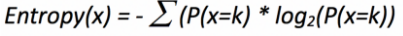

where P(x=k) is the probability that a target feature takes a specific value, k.
- Logarithm of fractions gives a negative value and hence a ‘-‘ sign is used in entropy formula to negate these negative values. The maximum value for entropy depends on the number of classes.

- Information Gain: To find the best feature which serves as a root node in terms of information gain, we first use each descriptive feature and split the dataset along the values of these descriptive features and then calculate the entropy of the dataset. This gives us the remaining entropy once we have split the dataset along the feature values. Then, we subtract this value from the originally calculated entropy of the dataset to see how much this feature splitting reduces the original entropy which gives the information gain of a feature and is calculated as:



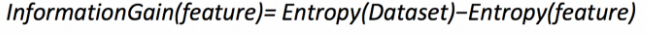

- The feature with the largest information gain should be used as the root node to start building the decision tree

- Gini Index: It is calculated by subtracting the sum of squared probabilities of each class from one. It favors larger partitions and easy to implement whereas information gain favors smaller partitions with distinct values.

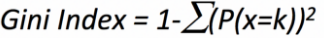

- A feature with a lower Gini index is chosen for a split

In [52]:
#shuffling our data set
subsample = df.sample(frac=0.1).reset_index(drop=True)
subsample['Class'].value_counts()

0    28420
1       61
Name: Class, dtype: int64

In [53]:
X1 = subsample.iloc[:,1:30]
y1 = subsample['Class']

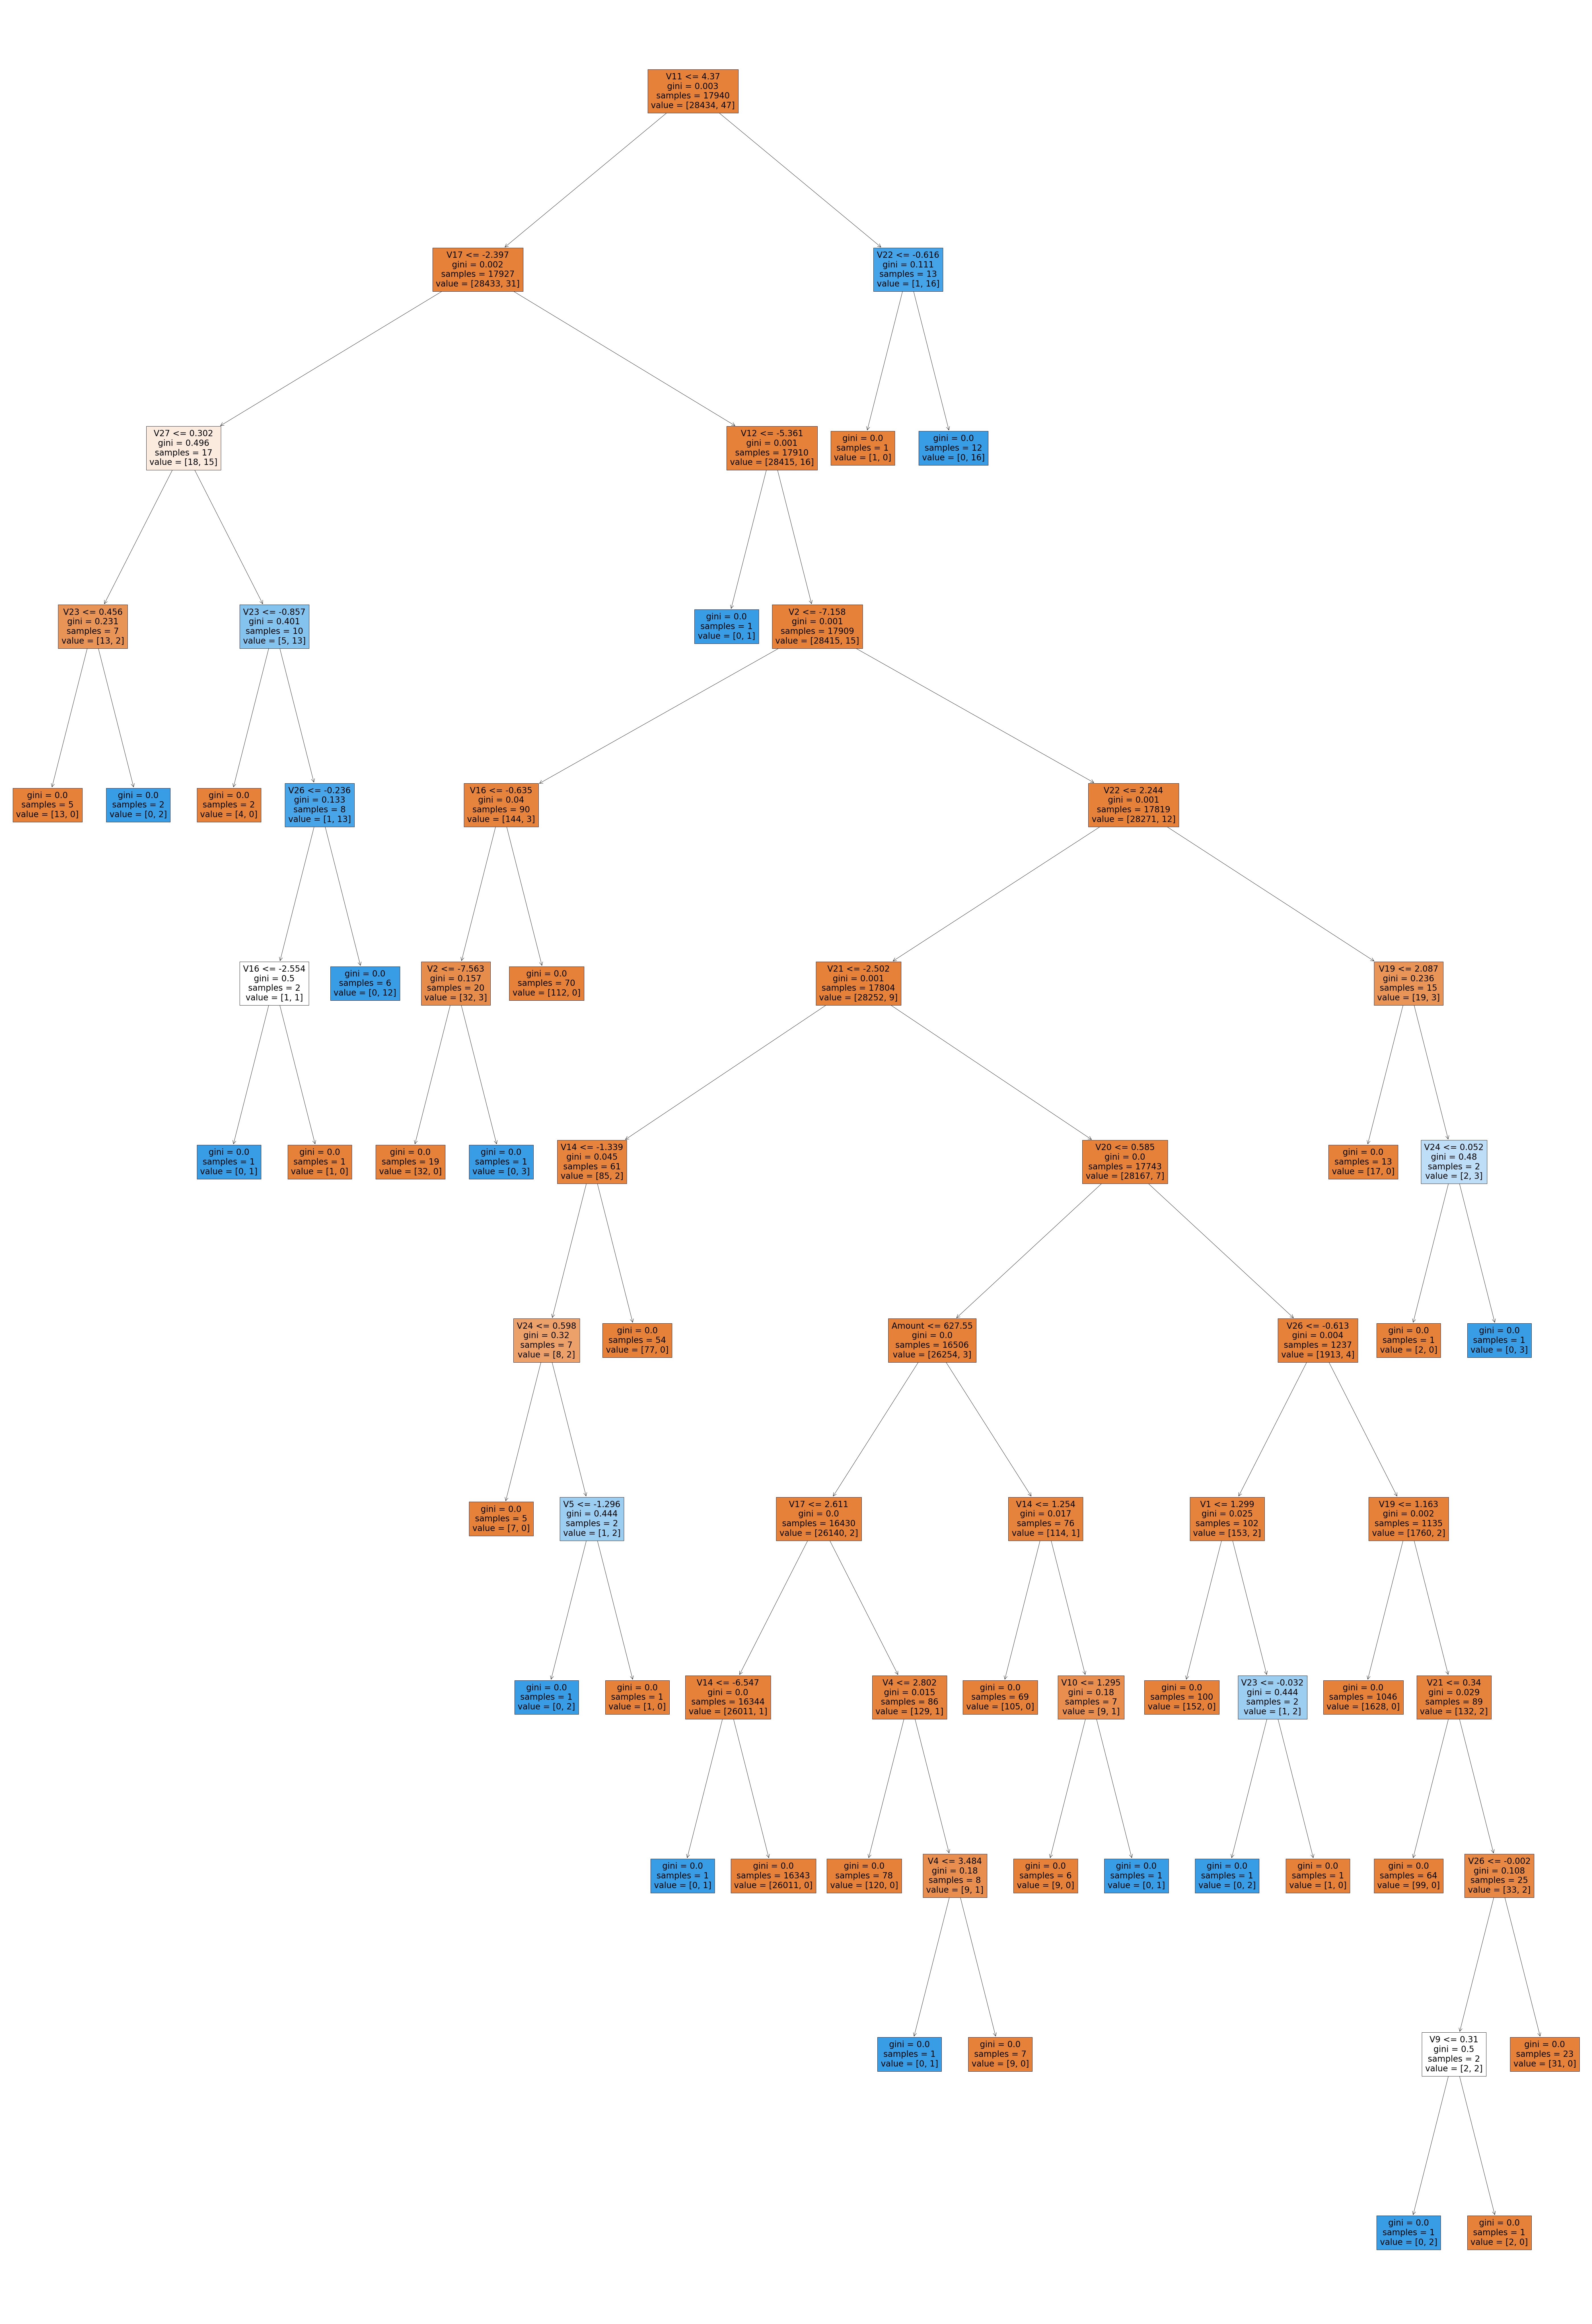

In [54]:
# Define the model as the decisiontree forest
rd_model = RandomForestClassifier()
rd_model.fit(X1, y1)

plt.figure(figsize=(100,150))
_ = tree.plot_tree(rd_model.estimators_[5], feature_names=subsample.columns[1:30], filled=True)

### Ensemble methods
![title](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/fraud_detection/ensemble.JPG)
- Ensemble methods are techniques that create multiple machine learning models and then combine them to produce a final result
- Usually produce more accurate predictions than a single model
- The goal of an ML problem is to find a single model that will best predict our wanted outcome
     - Use ensemble methods rather than making one model and hoping it's best, most accurate predictor
- Ensemble methods take a myriad of models into account and average them to produce one final model
     - Ensures the predictions are robust
    - Less likely to be the result of overfitting
    - Can improve prediction performance
        - Especially by combining models with different recall and precision scores
 - Are a winning formula at Kaggle competitions
- The Random Forest classifier is an ensemble of Decision Trees
- Bootstrap Aggregation or Bagging Ensemble method
- In a Random Forest, models are trained on random subsamples of data and the results are aggregated by taking the average prediction of all the trees.

#### Stacking Ensemble Methods
![title](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/fraud_detection/ensemble_stacking.JPG)
- Multiple models are combined via a "voting" rule on the model outcome
- The base level models are each trained based on the complete training set
- Unlike the Bagging method, models are not trained on a subsample of the data
- Algorithms of different types can be combined

In [55]:
# Define Models
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = DecisionTreeClassifier()

# Combine models into ensemble
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')

# Fit and predict as with other models
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

- the `voting='hard'` option uses the predicted class labels and takes the majority vote
- the `voting='soft'` option takes the average probability by combining the predicted probabilities of the individual models
- Weights can be assigned to the VotingClassifer with weights=[2,1,1]
  - Useful when one model significantly outperforms the others

In [56]:
ens_predicted =ensemble_model.predict(X_test)

In [57]:
ens_met = evaluation_metrics('Voting_Classifier',y_test,ens_predicted)
metrics = update_metrics(metrics,ens_met)

Accuracy score:  0.9994967405170698
Precision:  0.940677966101695
Recall:  0.7551020408163265
F1_Score: 0.8377358490566039
ROC_AUC score:  0.8775099868309733
Confusion matrix:
[[85289     7]
 [   36   111]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



#### Using SMOTE imbalanced dataset is transformed to a balanced one and thereby, training the voting classifer on that.

In [58]:
#Here we resample the Train data only not the test set.
smote = SMOTE()
X_resampled_sm, Y_resampled_sm = smote.fit_resample(X_train, y_train)

In [59]:
print('Count of Class before Oversampling ',Counter(y_train))
print('Count of Class after Oversampling ',Counter(Y_resampled_sm))

Count of Class before Oversampling  Counter({0: 199019, 1: 345})
Count of Class after Oversampling  Counter({0: 199019, 1: 199019})


- We can see that now both the classes have equal number of samples

In [60]:
# Define Models
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = DecisionTreeClassifier()

# Combine models into ensemble
ensemble_model_smote = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')

# Fit and predict as with other models
ensemble_model_smote.fit(X_resampled_sm, Y_resampled_sm)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [61]:
ens_predicted_smote =ensemble_model_smote.predict(X_test)

In [62]:
ens_met_sm = evaluation_metrics('Voting_Classifier_smote',y_test,ens_predicted_smote)
metrics = update_metrics(metrics,ens_met_sm)

Accuracy score:  0.9990519995786665
Precision:  0.6833333333333333
Recall:  0.8367346938775511
F1_Score: 0.7522935779816514
ROC_AUC score:  0.9180332163816568
Confusion matrix:
[[85239    57]
 [   24   123]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.68      0.84      0.75       147

    accuracy                           1.00     85443
   macro avg       0.84      0.92      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [63]:
#Metrics comparison
metrics_df = pd.DataFrame(metrics, columns=metrics.keys())
metrics_df

Models  Accuracy  Precision    Recall  F1-Score   ROC_AUC
0             Logistic_Reg  0.999204   0.883495  0.619048  0.728000  0.809453
1            Decision Tree  0.999321   0.829630  0.761905  0.794326  0.880818
2             RandomForest  0.999520   0.941667  0.768707  0.846442  0.884313
3        Voting_Classifier  0.999497   0.940678  0.755102  0.837736  0.877510
4  Voting_Classifier_smote  0.999052   0.683333  0.836735  0.752294  0.918033

### Inference

**Whilst comparing performance metrics, we need to take into account each of the above listed metrics since the classes are highly imbalanced. Hence, accuracy score alone will not give us a true picture regarding model performance.**

- Natural Hit Rate as estimated earlier was 99.83% but all our models exceed this rate while detecting frauds, hence all of the Machine Learning models we've built are good for our purpose.
- From Traditional Approach we observed that the recall value is very less, approximately 34%. In contrast, all of the Machine Learning models except for Logistic Regression have recall more than 75%.
- Also, the False Positives detected in traditional approach method is way too high compared to the above models. 
    - Ranking based on False Positve detection reveals default Voting Classifier has the least and Voting Classifier post SMOTE has the most.
    - (Voting Classifier < Random Forest Classifier < Logistic Regression < Decision Tree Classifier < Voting_Classifier_smote)
- Performance of Voting Classifer increases with the oversampled data (using SMOTE) since the classes are balanced out and the algorithm is able to learn the underlying patterns of both.
- Voting Classifier trained post SMOTE offers the maximum recall value, hence choosing Voting_Classifer_Smote as our final model.

**Let's train our best model on the entire resampled dataset**

In [64]:
# resampling the data
X_resample_sm, Y_resample_sm = oversample(X, y, SMOTE)

Before OverSampling, counts of label '0': 284315
Before OverSampling, counts of label '1': 492 

After OverSampling, counts of label '0': 284315
After OverSampling, counts of label '1': 284315


In [65]:
# Instantiating and fitting the best model on resampled data using smote
ensemble_model_smote = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='soft')
ensemble_model_smote.fit(X_resample_sm, Y_resample_sm)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [66]:
# Saving the above model as pickle file
pickle.dump(ensemble_model_smote, open('Anomaly_Detection_Model.pkl', 'wb'))

#### Let's create a dummy test instance to feed into our saved classifier 

In [68]:
df = pd.DataFrame({'category':'health_fitness','amt':295.75,'gender':'F','state':'AL','city_pop':38564},index=[0])

In [69]:
# function to prep our test input for encoding, scaling and pca
def pipe(df):
    
    amt = df['amt']
    city_p = df['city_pop']
    df1 = df.drop(['amt','city_pop'],axis=1)
    
    return (df1)

In [70]:
df1 = pipe(df)
df1

category gender state
0  health_fitness      F    AL

#### Reading the saved  encoder file

In [71]:
one_hot = pickle.load(open("one_hot.pkl",'rb'))
resultnew = one_hot .transform(df1)

In [72]:
resultnew.toarray()

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [73]:
Df_Encoded = pd.DataFrame(resultnew.toarray(),columns=one_hot.get_feature_names().tolist())
Df_Encoded['city_pop'] = df['city_pop']

#### Reading standard scaler file saved previously

In [74]:
scale = pickle.load(open("scaler.pkl",'rb'))
scaled_df = scale .transform(Df_Encoded)

#### Reading the saved PCA file 

In [75]:
PCA = pickle.load(open("PCA.pkl",'rb'))
PCA_DF = PCA.transform(scaled_df)

In [76]:
col=[]
for i in range(PCA_DF.shape[1]):
    col.append('V{}'.format(i+1))

In [77]:
final_input = pd.DataFrame(PCA_DF,columns=col)
final_input['amt'] = df['amt']
final_input

V1        V2        V3        V4        V5        V6        V7  \
0 -0.957602  0.057425  0.029611  0.662291  0.040579 -0.439088 -0.267039   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  1.103042 -0.227084 -1.628642  ...  0.039155 -1.649383 -1.346226  0.155851   

        V24       V25       V26      V27       V28     amt  
0  0.219196  0.501398 -0.064312  1.39186 -0.315167  295.75  

[1 rows x 29 columns]

#### Our test input is now ready to be fed into the model we saved earlier

#### Reading the classifier model

In [78]:
voting_classifier_smote = pickle.load(open('Anomaly_Detection_Model.pkl','rb'))

In [79]:
print(voting_classifier_smote.predict(final_input))

[0]


In [80]:
print(voting_classifier_smote.predict_proba(final_input))

[[0.9325302 0.0674698]]


### Our model is predicting the test input as a valid transaction with a probability of 93.25%

In [81]:
### end of notebook